In [1]:
import json
import glob
import re

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np

In [3]:
users = {}
repos = {}
edges = {}

for filename in glob.glob("/home/jpivarski/storage/data/physicists/iris-hep-connections/issue-search-results/*.json"):
    user = re.match(r"/home/jpivarski/storage/data/physicists/iris-hep-connections/issue-search-results/(.*)\.[0-9]*\.json", filename).group(1)
    if user not in users:
        users[user] = len(users)
    with open(filename, "r") as file:
        data = json.load(file)
        for item in data.get("items", []):
            repo = item["repository_url"].replace("https://api.github.com/repos/", "")
            if repo not in repos:
                repos[repo] = len(repos)
            key = (users[user], repos[repo])
            if key not in edges:
                edges[key] = 0
            edges[key] += 1

In [4]:
userlist = list(users.keys())
repolist = list(repos.keys())

assert [users[x] for x in userlist] == list(range(len(users)))
assert [repos[x] for x in repolist] == list(range(len(repos)))

In [5]:
usertotals = [0] * len(userlist)
repototals = [0] * len(repolist)

for (userid, repoid), weight in edges.items():
    usertotals[userid] += weight
    repototals[repoid] += weight

In [6]:
g = nx.Graph()

for user in userlist:
    g.add_node(user, bipartite=0)

for repo in repolist:
    g.add_node(repo, bipartite=1)

for (userid, repoid), weight in edges.items():
    if repolist[repoid] != "iris-hep/iris-hep.github.io-source":
        g.add_edge(userlist[userid], repolist[repoid], weight=1/weight)

In [7]:
# [repo for repo, distance in nx.single_source_dijkstra_path_length(g, "osg-cat").items() if repo in repolist]

In [8]:
repo_order = [
 # davidlange6
 'cms-sw/cmssw',
 'cms-sw/cmsdist',

 # vgvassilev
 'root-project/root',
 'vgvassilev/clad',
 'root-project/rootbench',
 'root-project/cling',
 'root-project/roottest',
 'compiler-research/compiler-research.github.io',

 # matthewfeickert
 'scikit-hep/pyhf',
 'matthewfeickert/heputils',
 'pyhf/pyhf-tutorial',

 # alexander-held
 'scikit-hep/cabinetry',
 'iris-hep/analysis-grand-challenge',
 'recast-hep/recast-atlas',

 # jpivarski
 'scikit-hep/awkward-1.0',
 'scikit-hep/uproot4',
 'scikit-hep/vector',
 'scikit-hep/fastjet',

 # oshadura
 'CoffeaTeam/coffea-casa',
 'CoffeaTeam/docker-coffea-dask',
 'CoffeaTeam/docker-coffea-base',
 'CoffeaTeam/coffea',

 # gordonwatts
 'ssl-hep/ServiceX_frontend',
 'ssl-hep/ServiceX',
 'ssl-hep/ServiceX_App',
 'ssl-hep/ServiceX_xAOD_CPP_transformer',
 'ssl-hep/ServiceX_DID_Finder_Rucio',
 'ssl-hep/ServiceX_DID_Finder_lib',
 'ssl-hep/ServiceX_Uproot_Transformer',
 'ssl-hep/ServiceX_Code_Generator_FuncADL_xAOD',
 'ssl-hep/ServiceX_transformer',
 'ssl-hep/ServiceX_Code_Generator_FuncADL_uproot',
 'ssl-hep/servicex-backend-tests',
 'ssl-hep/servicex_cli',
 'iris-hep/func_adl_servicex',
 'iris-hep/func_adl_xAOD',
 'iris-hep/func_adl',
 'iris-hep/opendata-higgs-discovery',
 'iris-hep/func_adl_uproot',
 'gordonwatts/snowmass-loi-words',
 'gordonwatts/layered-edm',
 'gordonwatts/hep_tables',
 'gordonwatts/dataframe_expressions',
 'gordonwatts/xaod_usage',
 'gordonwatts/hl_tables',
 'gordonwatts/seattlesnowmass2021',
 'gordonwatts/servicex-coffea-multiprocessing',
 'funcx-faas/funcx-web-service',
 'funcx-faas/helm-chart',
 'funcx-faas/funcX',
 'funcx-faas/funcx-container-service',
 'funcx-faas/funcx-forwarder',
 'CodeforHawaii/ACLU',
 'opensciencegrid/operations',
 'ssl-hep/X509_Secrets',
 'vc3-project/vc3-website-python',

 # bbockelm
 'xrootd/xrootd',
 'htcondor/htcondor',
 'path-cc/path-cc.github.io',
 'opensciencegrid/docs',

 # cranmer
 'cranmer/intro-exp-phys-II',
 'diana-hep/carl',
 'everpub/openscienceprize',
 'recast-hep/recast-control-center-prototype',
 'iris-hep/analysis-community-summary',
 'scailfin/MadGraph5-simulation-configs',
 'scikit-hep/pylhe',
 'cernanalysispreservation/analysispreservation.cern.ch',
 'recast-hep/recast-flask-frontend',
 'iml-wg/HEPML-LivingReview',
 'scailfin/MadGraph5_aMC-NLO',
 'iml-wg/HEP-ML-Resources',
 'iris-hep/project-milestones',
 'CHTC/chtc-website-source',
 'yadage/yadage',
 'illinois-mla/phys-398-mla-image',
 'histfitter/histfitter',
 'madminer-tool/madminer',
 'DonDebonair/pelican-bootstrap3',
 'cranmer/parametrized-learning',
 'Neubauer-Group/dgx-setup',
 'scitokens/scitokens-cpp',

 # osg-cat
 'opensciencegrid/management',
 'opensciencegrid/all-hands',
 'opensciencegrid/opensciencegrid.github.io',
 'opensciencegrid/virtual-school-2021',
 'opensciencegrid/user-school-2018',
 'opensciencegrid/virtual-school-pilot-2020',
 'opensciencegrid/technology',
 'opensciencegrid/user-school-2019',
 'opensciencegrid/osg-test',
 'opensciencegrid/outreach',
 'opensciencegrid/user-school-2017',

 # danielskatz
 'openjournals/joss-reviews',
 'USRSE/usrse.github.io',
 'openjournals/joss',
 'rse-council/researchsoftware.org',
 'Parsl/parsl',
 'FAIR4HEP/fair4hep.github.io',

 # ivotron
 'redpanda-data/redpanda',
 'getpopper/popper',
 'ivotron/popper-canopie-paper',
 'getpopper/website',
 'redpanda-data/deployment-automation',
 'uccross/skyhookdm-workflows',
 'uccross/skyhookdm-ceph-cls',
 'uccross/skyhookdm-ceph',
 'jsysresearch/website',
 'uccross/skyhookdm-arrow',
 'go-task/task',
 'nicolecastillo/xlearn',
 'uccross/uccross.github.io',
 'getpopper/library',
 'carlosmalt/radossim',
 'michaelsevilla/malacology-popper',
 'redpanda-data/ducktape',
 'edeediong/multiz-workflow',
 'FernandaDguez/spdk',
 'getpopper/popper-examples',
 'dbgroup-at-ucsc/dbtune',
 'systemslab/popper-paper',
 'michaelsevilla/pdsw15',
 'ivotron/redpanda',
 'redpanda-data/chaos',
 'ivotron/popper-jors-paper',
 'VI4IO/jhps-template',
 'lkuper/CSE232-2020-10',
 'uccross/skyhookdm-pythonclient',
 'carlosmalt/k_grok',
 'hsf-training/hsf-training-matplotlib',

 # henryiii
 'pybind/pybind11',
 'scikit-build/scikit-build',
 'pypa/cibuildwheel',
 'pyodide/pyodide',
 'scikit-hep/uproot-browser',
 'wntrblm/nox',
 'scikit-hep/boost-histogram',
 'scikit-hep/hist',
 'scikit-hep/scikit-hep.github.io',
 'pypa/build',
 'tomerfiliba/plumbum',
 'scikit-hep/cookie',
 'conda-forge/uproot-feedstock',
 'conda-forge/awkward-feedstock',
 'conda-forge/root-feedstock',
]

In [9]:
weighted_users = sorted(zip(userlist, usertotals), key=lambda x: -x[1])
weighted_repos = sorted(zip(repolist, repototals), key=lambda x: -x[1])

In [10]:
num_users = len(weighted_users) - 5
selected_users = [user for user, _ in weighted_users][:num_users]
selected_repos = [repo for repo in repo_order if repototals[repos[repo]] > 40]
num_repos = len(selected_repos)

g = nx.Graph()

for user in selected_users:
    g.add_node(user, bipartite=0)
    
for repo in selected_repos:
    g.add_node(repo, bipartite=1)

for (userid, repoid), weight in edges.items():
    user = userlist[userid]
    repo = repolist[repoid]
    if user in selected_users and repo in selected_repos:
        g.add_edge(user, repo, weight=weight)

weights = nx.get_edge_attributes(g, "weight").values()

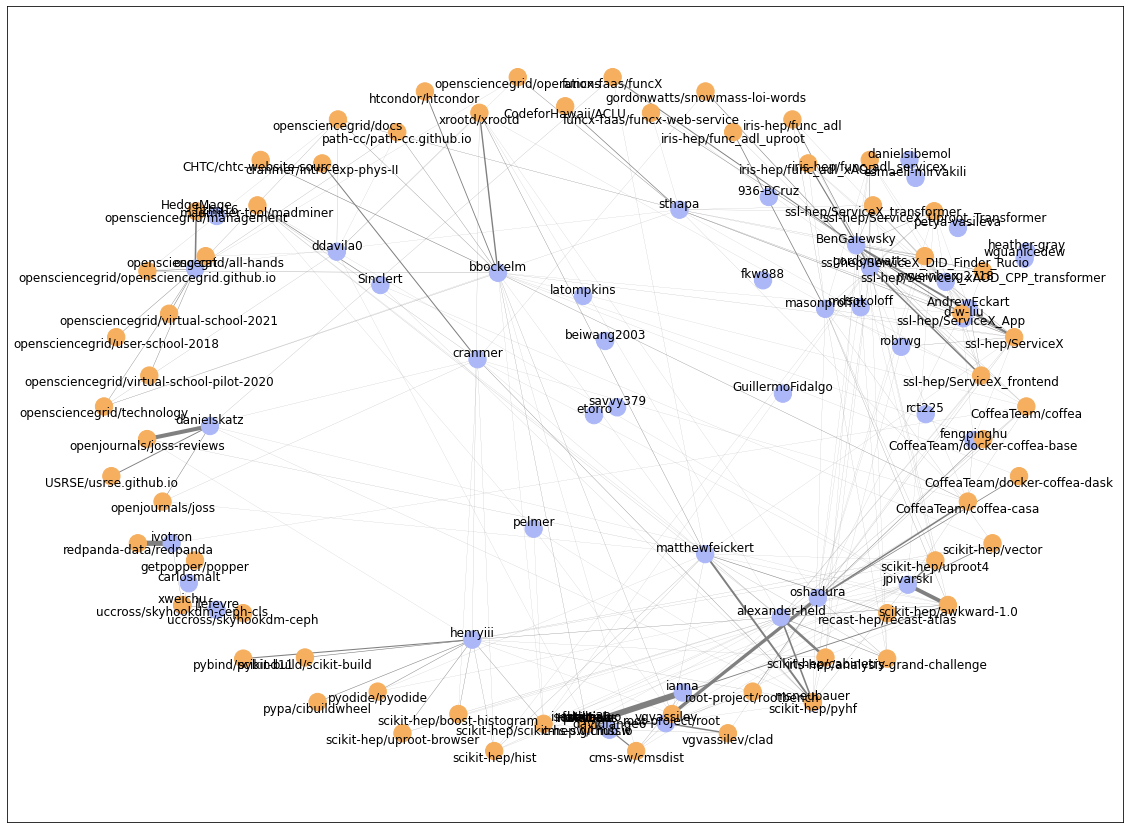

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

pos = nx.spring_layout(
    g,
    k=0.001,
    pos={repo: (10 + (i % 2))*np.array([np.cos(2*np.pi*(i+0.5)/num_repos - np.pi/2), np.sin(2*np.pi*(i+0.5)/num_repos - np.pi/2)]) for i, repo in enumerate(selected_repos)},
    fixed=selected_repos,
    iterations=200,
)

nx.draw_networkx_nodes(
    g,
    pos=pos,
    node_color=(["#abb7f7"] * num_users + ["#f5af5f"] * num_repos),
    ax=ax,
)
nx.draw_networkx_edges(
    g,
    pos=pos,
    width=np.fromiter(weights, np.float64) * 6 / max(weights) + 0.1,
    edge_color="gray",
    ax=ax,
)
nx.draw_networkx_labels(g.subgraph(selected_users), pos=pos, verticalalignment="bottom", ax=ax)
nx.draw_networkx_labels(g.subgraph(selected_repos), pos=pos, verticalalignment="top", ax=ax)

ax.margins(x=0.05)
fig.savefig("PLOTS/iris-hep-github-connections.svg")
fig.savefig("PLOTS/iris-hep-github-connections.pdf")

In [16]:
num_users = len(weighted_users)
selected_users = [user for user, _ in weighted_users][:num_users]
selected_repos = ["boostorg/histogram", "scikit-hep/boost-histogram", "scikit-hep/hist", "scikit-hep/histoprint", "scikit-hep/mplhep"]
num_repos = len(selected_repos)

g = nx.Graph()

for user in selected_users:
    g.add_node(user, bipartite=0)
    
for repo in selected_repos:
    g.add_node(repo, bipartite=1)

for (userid, repoid), weight in edges.items():
    user = userlist[userid]
    repo = repolist[repoid]
    if user in selected_users and repo in selected_repos:
        g.add_edge(user, repo, weight=weight)

weights = nx.get_edge_attributes(g, "weight").values()

In [21]:
g.remove_nodes_from(list(nx.isolates(g)))

In [32]:
num_users = g.number_of_nodes() - num_repos

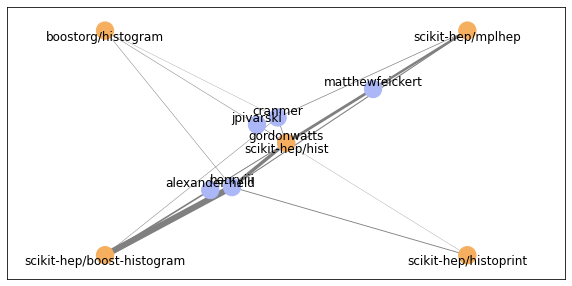

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

pos = nx.spring_layout(
    g,
    k=0.001,
    pos={
        "boostorg/histogram": (-1, 1),
        "scikit-hep/boost-histogram": (-1, -1),
        "scikit-hep/hist": (0, 0),
        "scikit-hep/histoprint": (1, -1),
        "scikit-hep/mplhep": (1, 1),
    },
    fixed=selected_repos,
    iterations=200,
)

nx.draw_networkx_nodes(
    g,
    pos=pos,
    node_color=(["#abb7f7"] * num_users + ["#f5af5f"] * num_repos),
    ax=ax,
)
nx.draw_networkx_edges(
    g,
    pos=pos,
    width=np.fromiter(weights, np.float64) * 6 / max(weights) + 0.1,
    edge_color="gray",
    ax=ax,
)
nx.draw_networkx_labels(g.subgraph(selected_users), pos=pos, verticalalignment="bottom", ax=ax)
nx.draw_networkx_labels(g.subgraph(selected_repos), pos=pos, verticalalignment="top", ax=ax)

ax.margins(x=0.2)
fig.savefig("PLOTS/iris-hep-histogram-connections.svg")